# US Metro Regional Housing Affordability Analysis - Part1
## Datasets -  Metro - Home Price Index & Rental Affordability Index from Zillow
### To run this notebook you need the following libraries: pandas, matplotlib,seaborn, and statsmodel.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the metro-level datasets
zhvi_df = pd.read_csv("data/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
zori_df = pd.read_csv("data/Metro_zori_uc_sfrcondomfr_sm_month.csv")

# Display summary statistics
print("ZHVI Dataset Description:\n", zhvi_df.describe(include='all'))
print("\n")
print("\nZORI Dataset Description:\n", zori_df.describe(include='all'))


ZHVI Dataset Description:
              RegionID    SizeRank  RegionName RegionType StateName  \
count      895.000000  895.000000         895        895       894   
unique            NaN         NaN         895          2        50   
top               NaN         NaN  Lamesa, TX        msa        TX   
freq              NaN         NaN           1        894        67   
mean    412099.672626  461.751955         NaN        NaN       NaN   
std      78377.355083  268.710532         NaN        NaN       NaN   
min     102001.000000    0.000000         NaN        NaN       NaN   
25%     394546.000000  230.500000         NaN        NaN       NaN   
50%     394795.000000  460.000000         NaN        NaN       NaN   
75%     395044.500000  689.500000         NaN        NaN       NaN   
max     753929.000000  939.000000         NaN        NaN       NaN   

           2000-01-31     2000-02-29     2000-03-31     2000-04-30  \
count      431.000000     432.000000     433.000000     435.00

In [19]:
# Constants from Zillow methodology
d = 0.20                   # Down payment rate
r = 0.065 / 12             # Monthly interest rate
i = 0.004                  # Insurance rate
t = 0.0125                 # Tax rate
n = 360                    # Number of monthly payments (30 years)

# Melt wide format to long format
zhvi_long = zhvi_df.melt(
    id_vars=['RegionID', 'RegionName', 'RegionType', 'StateName', 'SizeRank'],
    var_name='Date',
    value_name='ZHVI'
)

# Drop missing ZHVI values
zhvi_long = zhvi_long.dropna(subset=['ZHVI'])

# Calculate mortgage payment (m)
zhvi_long['Mortgage'] = (
    zhvi_long['ZHVI'] * (1 - d) * r * (1 + r) ** n / ((1 + r) ** n - 1)
)

# Calculate total monthly payment (P)
zhvi_long['TotalMonthlyPayment'] = (
    zhvi_long['Mortgage'] + zhvi_long['ZHVI'] * ((i + t + 0.005) / 12)
)

# Calculate income needed to afford home
zhvi_long['IncomeNeededToAffordHome'] = (
    12 * zhvi_long['TotalMonthlyPayment'] / 0.3
)


In [20]:
# Melt wide format to long format
zori_long = zori_df.melt(
    id_vars=['RegionID', 'RegionName', 'RegionType', 'StateName', 'SizeRank'],
    var_name='Date',
    value_name='ZORI'
)

# Drop missing ZORI values
zori_long = zori_long.dropna(subset=['ZORI'])

# Calculate income needed to afford rent
zori_long['IncomeNeededToAffordRent'] = (
    12 * zori_long['ZORI'] / 0.3
)


In [21]:
# Display summary statistics
print("ZHVI Dataset Description:\n", zhvi_long.describe(include='all'))
print("\n")
print("\nZORI Dataset Description:\n", zori_long.describe(include='all'))


ZHVI Dataset Description:
              RegionID RegionName RegionType StateName       SizeRank  \
count   221919.000000     221919     221919    221616  221919.000000   
unique            NaN        895          2        50            NaN   
top               NaN  Craig, CO        msa        TX            NaN   
freq              NaN        303     221616     13626            NaN   
mean    411996.676346        NaN        NaN       NaN     430.303025   
std      78417.774652        NaN        NaN       NaN     267.520420   
min     102001.000000        NaN        NaN       NaN       0.000000   
25%     394544.000000        NaN        NaN       NaN     193.000000   
50%     394803.000000        NaN        NaN       NaN     415.000000   
75%     395047.000000        NaN        NaN       NaN     654.000000   
max     753929.000000        NaN        NaN       NaN     939.000000   

              Date          ZHVI       Mortgage  TotalMonthlyPayment  \
count       221919  2.219190e+05  22

In [22]:
# List all unique Region Names
unique_regions = zhvi_long['RegionName'].unique()
print(f"Total regions available: {len(unique_regions)}")
print(unique_regions)


Total regions available: 895
['United States' 'New York, NY' 'Los Angeles, CA' 'Chicago, IL'
 'Dallas, TX' 'Houston, TX' 'Washington, DC' 'Philadelphia, PA'
 'Miami, FL' 'Atlanta, GA' 'Boston, MA' 'Phoenix, AZ' 'San Francisco, CA'
 'Riverside, CA' 'Detroit, MI' 'Seattle, WA' 'Minneapolis, MN'
 'San Diego, CA' 'Tampa, FL' 'Denver, CO' 'Baltimore, MD' 'St. Louis, MO'
 'Orlando, FL' 'Charlotte, NC' 'San Antonio, TX' 'Portland, OR'
 'Sacramento, CA' 'Pittsburgh, PA' 'Cincinnati, OH' 'Austin, TX'
 'Las Vegas, NV' 'Kansas City, MO' 'Columbus, OH' 'Cleveland, OH'
 'San Jose, CA' 'Nashville, TN' 'Virginia Beach, VA' 'Providence, RI'
 'Jacksonville, FL' 'Milwaukee, WI' 'Oklahoma City, OK' 'Raleigh, NC'
 'Memphis, TN' 'Richmond, VA' 'Louisville, KY' 'New Orleans, LA'
 'Salt Lake City, UT' 'Hartford, CT' 'Buffalo, NY' 'Birmingham, AL'
 'Rochester, NY' 'Grand Rapids, MI' 'Tucson, AZ' 'Urban Honolulu, HI'
 'Tulsa, OK' 'Fresno, CA' 'Worcester, MA' 'Omaha, NE' 'Bridgeport, CT'
 'Greenville, SC' 'Bake

<Figure size 1800x800 with 0 Axes>

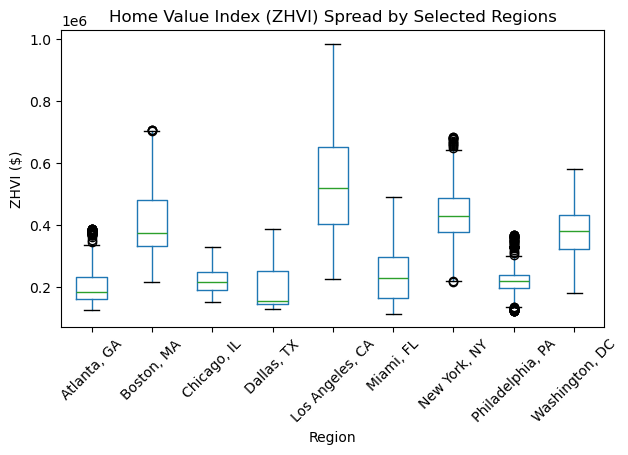

In [23]:
# --- CONTINUATION ---

# Selected simple metro names you gave
selected_regions = [
    'New York, NY', 'Los Angeles, CA', 'Chicago, IL',
    'Dallas, TX', 'Washington, DC', 'Philadelphia, PA',
    'Miami, FL', 'Atlanta, GA', 'Boston, MA'
]

# Filter zhvi_long
zhvi_selected = zhvi_long[zhvi_long['RegionName'].isin(selected_regions)]

# Plot Boxplots
plt.figure(figsize=(18, 8))
zhvi_selected.boxplot(
    column='ZHVI',
    by='RegionName',
    grid=False,
    rot=45
)
plt.title('Home Value Index (ZHVI) Spread by Selected Regions')
plt.suptitle('')
plt.xlabel('Region')
plt.ylabel('ZHVI ($)')
plt.tight_layout()
plt.show()


<Figure size 2000x800 with 0 Axes>

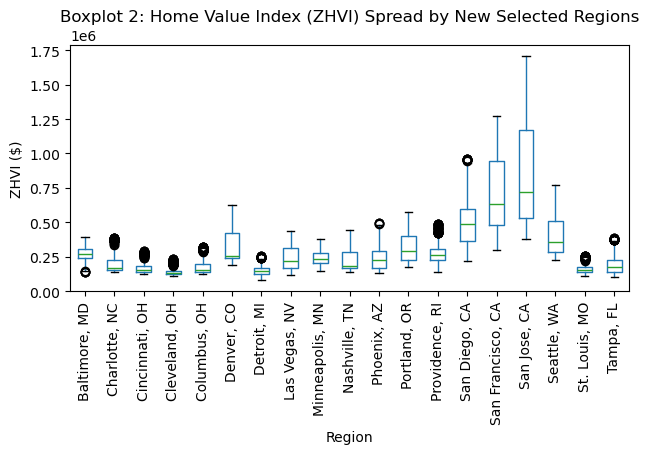

In [24]:
# --- CONTINUATION ---

# Boxplot 2 regions (your latest list only)
boxplot2_regions = [
    'Phoenix, AZ', 'San Francisco, CA',
    'Detroit, MI', 'Seattle, WA', 'Minneapolis, MN',
    'San Diego, CA', 'Tampa, FL', 'Denver, CO', 'Baltimore, MD', 'St. Louis, MO',
    'Charlotte, NC', 'Portland, OR', 'Cincinnati, OH',
    'Las Vegas, NV', 'Columbus, OH', 'Cleveland, OH',
    'San Jose, CA', 'Nashville, TN', 'Providence, RI'
]

# Filter zhvi_long
zhvi_selected_boxplot2 = zhvi_long[zhvi_long['RegionName'].isin(boxplot2_regions)]

# Plot Boxplot 2
plt.figure(figsize=(20, 8))
zhvi_selected_boxplot2.boxplot(
    column='ZHVI',
    by='RegionName',
    grid=False,
    rot=90
)
plt.title('Boxplot 2: Home Value Index (ZHVI) Spread by New Selected Regions')
plt.suptitle('')
plt.xlabel('Region')
plt.ylabel('ZHVI ($)')
plt.tight_layout()
plt.show()

<Figure size 2000x800 with 0 Axes>

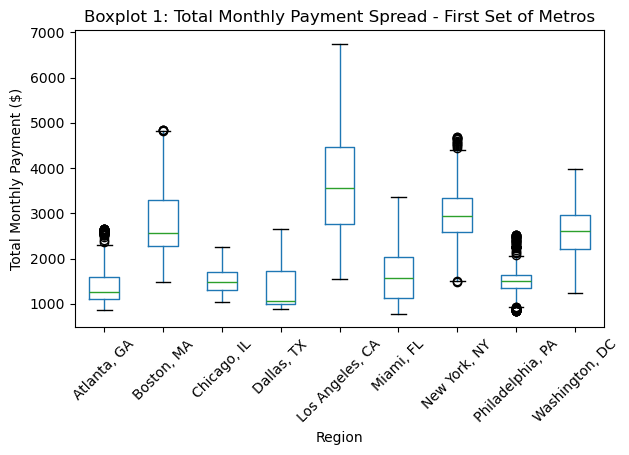

<Figure size 2200x800 with 0 Axes>

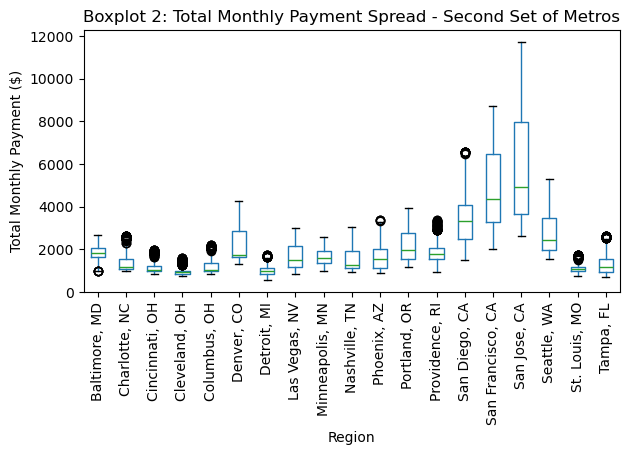

In [25]:
# --- CONTINUATION ---

# 1. Define the first set of metros
first_set_regions = [
    'New York, NY', 'Los Angeles, CA', 'Chicago, IL', 
    'Dallas, TX', 'Washington, DC', 'Philadelphia, PA', 
    'Miami, FL', 'Atlanta, GA', 'Boston, MA'
]

# 2. Define the second set of metros
second_set_regions = [
    'Phoenix, AZ', 'San Francisco, CA', 'Detroit, MI', 'Seattle, WA', 'Minneapolis, MN',
    'San Diego, CA', 'Tampa, FL', 'Denver, CO', 'Baltimore, MD', 'St. Louis, MO',
    'Charlotte, NC', 'Portland, OR', 'Cincinnati, OH', 'Las Vegas, NV',
    'Columbus, OH', 'Cleveland, OH', 'San Jose, CA', 'Nashville, TN', 'Providence, RI'
]

# 3. Filter zhvi_long separately
zhvi_first_set = zhvi_long[zhvi_long['RegionName'].isin(first_set_regions)]
zhvi_second_set = zhvi_long[zhvi_long['RegionName'].isin(second_set_regions)]

# 4. Plot Boxplot 1: Total Monthly Payment for First Set
plt.figure(figsize=(20, 8))
zhvi_first_set.boxplot(
    column='TotalMonthlyPayment',
    by='RegionName',
    grid=False,
    rot=45
)
plt.title('Boxplot 1: Total Monthly Payment Spread - First Set of Metros')
plt.suptitle('')
plt.xlabel('Region')
plt.ylabel('Total Monthly Payment ($)')
plt.tight_layout()
plt.show()

# 5. Plot Boxplot 2: Total Monthly Payment for Second Set
plt.figure(figsize=(22, 8))
zhvi_second_set.boxplot(
    column='TotalMonthlyPayment',
    by='RegionName',
    grid=False,
    rot=90
)
plt.title('Boxplot 2: Total Monthly Payment Spread - Second Set of Metros')
plt.suptitle('')
plt.xlabel('Region')
plt.ylabel('Total Monthly Payment ($)')
plt.tight_layout()
plt.show()

<Figure size 2000x800 with 0 Axes>

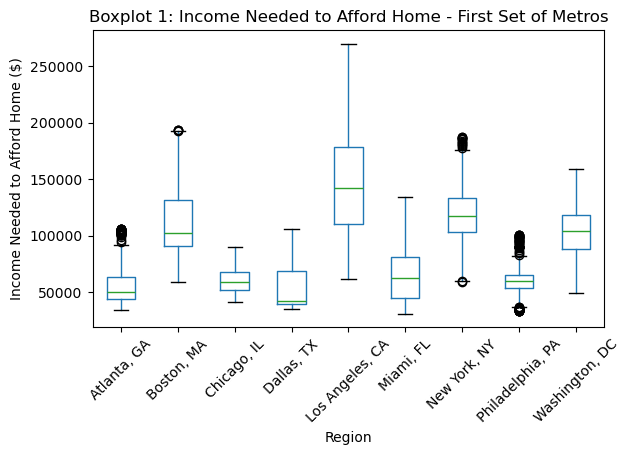

<Figure size 2200x800 with 0 Axes>

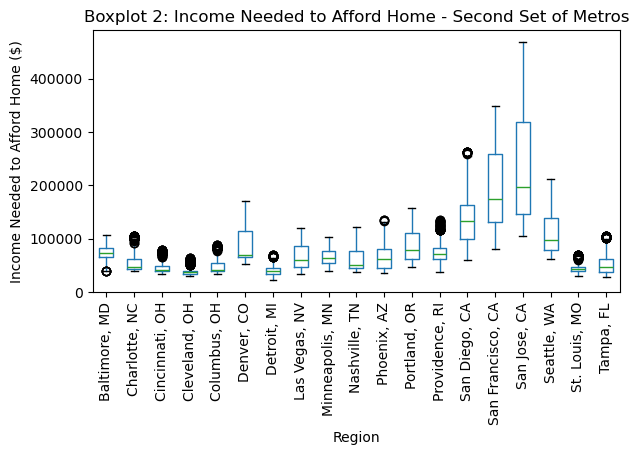

In [26]:
# --- CONTINUATION ---

# 1. Boxplot for Income Needed to Afford Home - First Set
plt.figure(figsize=(20, 8))
zhvi_first_set.boxplot(
    column='IncomeNeededToAffordHome',
    by='RegionName',
    grid=False,
    rot=45
)
plt.title('Boxplot 1: Income Needed to Afford Home - First Set of Metros')
plt.suptitle('')
plt.xlabel('Region')
plt.ylabel('Income Needed to Afford Home ($)')
plt.tight_layout()
plt.show()

# 2. Boxplot for Income Needed to Afford Home - Second Set
plt.figure(figsize=(22, 8))
zhvi_second_set.boxplot(
    column='IncomeNeededToAffordHome',
    by='RegionName',
    grid=False,
    rot=90
)
plt.title('Boxplot 2: Income Needed to Afford Home - Second Set of Metros')
plt.suptitle('')
plt.xlabel('Region')
plt.ylabel('Income Needed to Afford Home ($)')
plt.tight_layout()
plt.show()

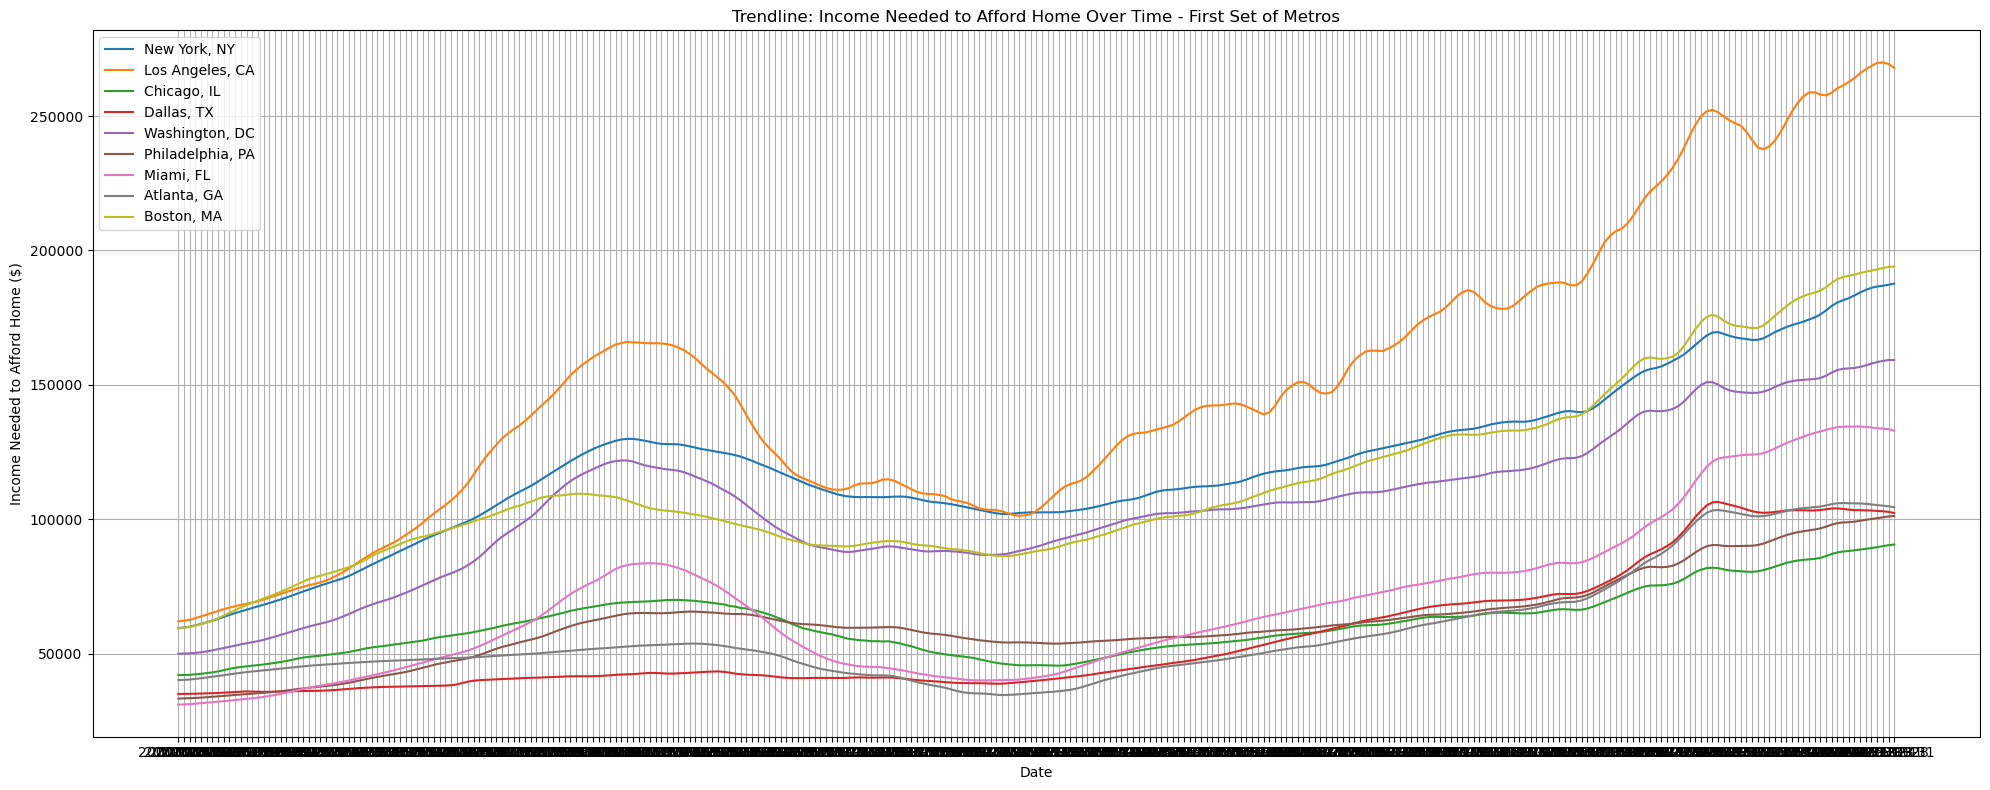

In [27]:
# --- CONTINUATION ---

# 1. Trendline for First Set: Income Needed to Afford Home
plt.figure(figsize=(20, 8))

for region in first_set_regions:
    region_data = zhvi_first_set[zhvi_first_set['RegionName'] == region]
    plt.plot(region_data['Date'], region_data['IncomeNeededToAffordHome'], label=region)

plt.title('Trendline: Income Needed to Afford Home Over Time - First Set of Metros')
plt.xlabel('Date')
plt.ylabel('Income Needed to Afford Home ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
# --- CONTINUATION ---

# Create a copy to work safely
zhvi_first_set_yoy = zhvi_first_set.copy()
zhvi_second_set_yoy = zhvi_second_set.copy()

# Sort values for diff calculation
zhvi_first_set_yoy = zhvi_first_set_yoy.sort_values(['RegionName', 'Date'])
zhvi_second_set_yoy = zhvi_second_set_yoy.sort_values(['RegionName', 'Date'])

# Calculate YoY Change: Group by RegionName, then shift by 12 months
zhvi_first_set_yoy['IncomeNeededYoYChange'] = zhvi_first_set_yoy.groupby('RegionName')['IncomeNeededToAffordHome'].pct_change(periods=12) * 100
zhvi_second_set_yoy['IncomeNeededYoYChange'] = zhvi_second_set_yoy.groupby('RegionName')['IncomeNeededToAffordHome'].pct_change(periods=12) * 100

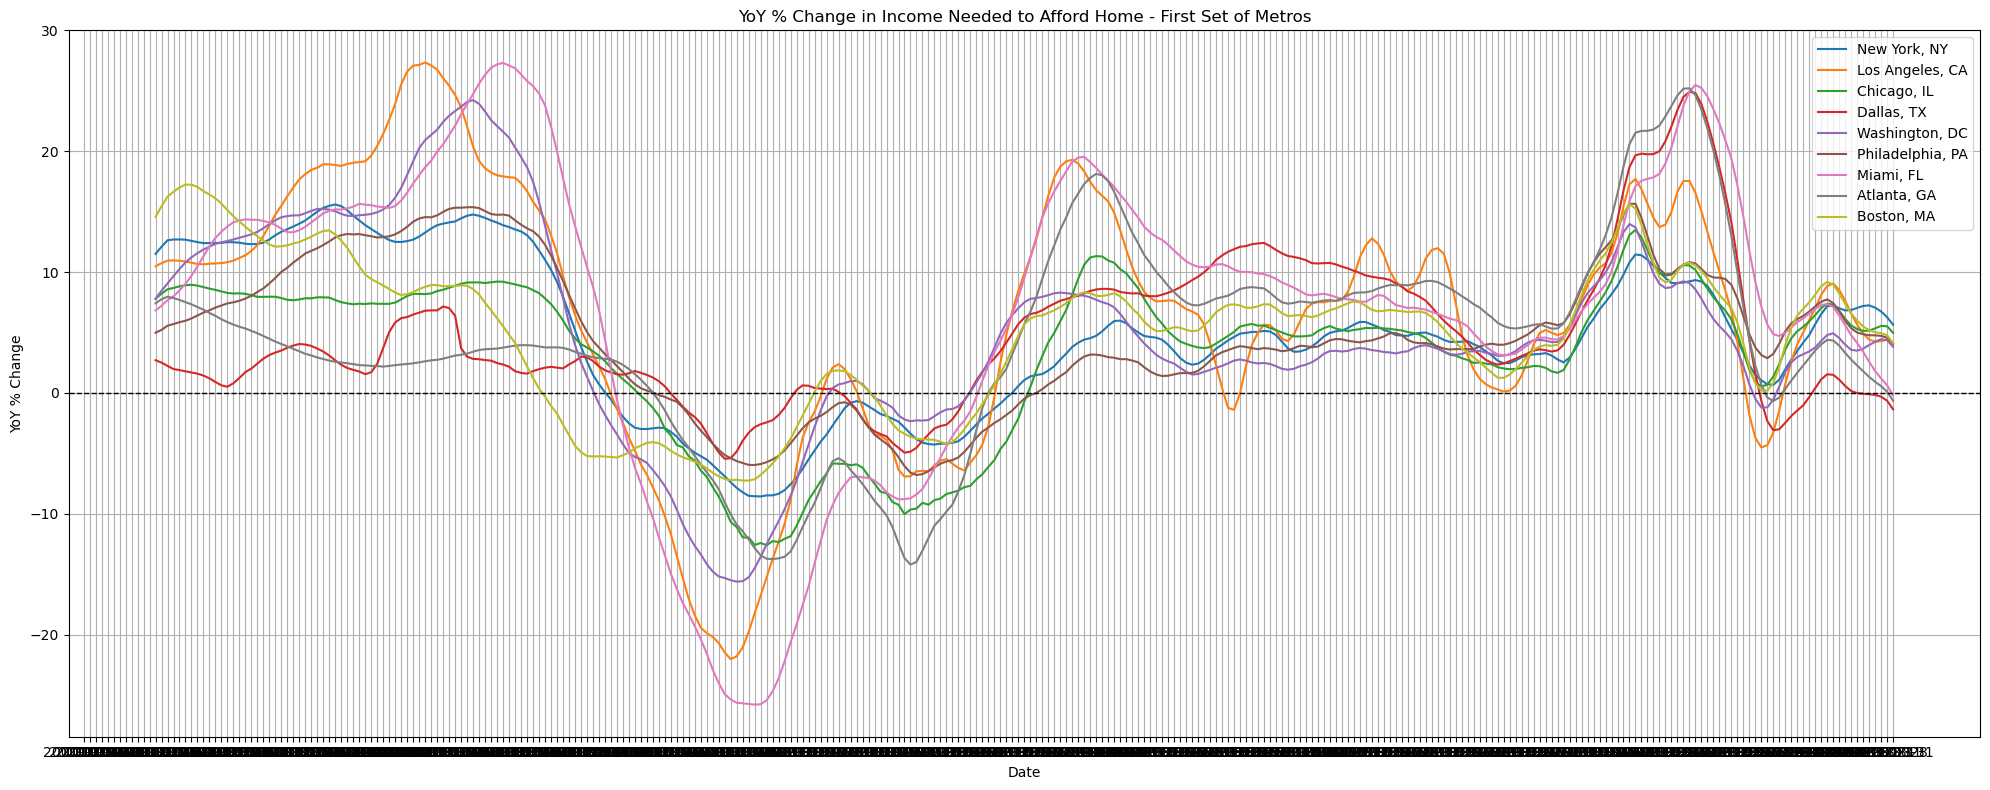

In [29]:
# 1. YoY Trendline for First Set
plt.figure(figsize=(20, 8))

for region in first_set_regions:
    region_data = zhvi_first_set_yoy[zhvi_first_set_yoy['RegionName'] == region]
    plt.plot(region_data['Date'], region_data['IncomeNeededYoYChange'], label=region)

plt.axhline(0, color='black', linestyle='--', linewidth=1)  # horizontal line at 0% change
plt.title('YoY % Change in Income Needed to Afford Home - First Set of Metros')
plt.xlabel('Date')
plt.ylabel('YoY % Change')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
# --- CONTINUATION ---

# Filter zori_long for first and second sets
zori_first_set = zori_long[zori_long['RegionName'].isin(first_set_regions)]
zori_second_set = zori_long[zori_long['RegionName'].isin(second_set_regions)]


<Figure size 2000x800 with 0 Axes>

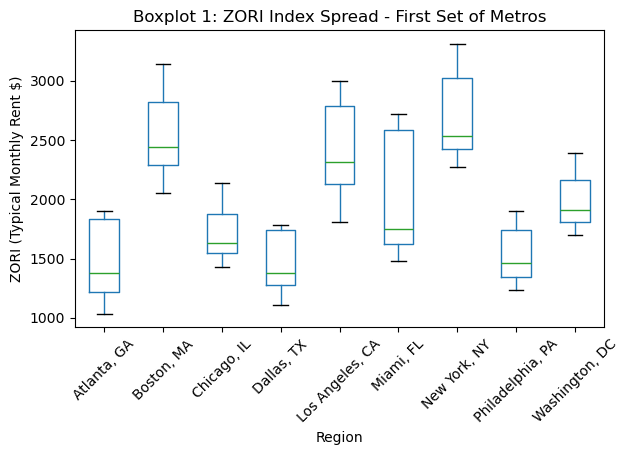

<Figure size 2200x800 with 0 Axes>

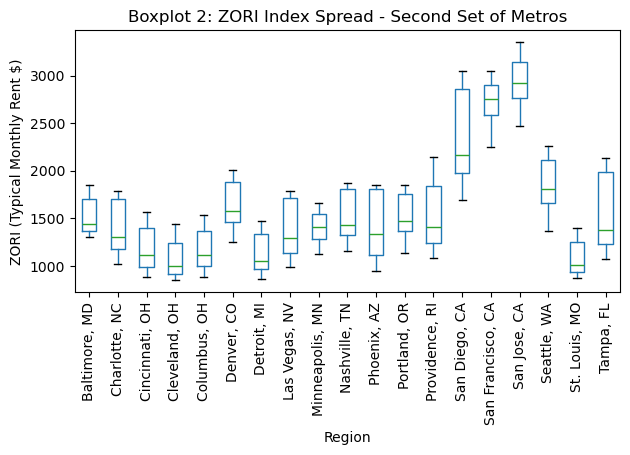

In [31]:
# Boxplot 1: ZORI Index - First Set
plt.figure(figsize=(20, 8))
zori_first_set.boxplot(
    column='ZORI',
    by='RegionName',
    grid=False,
    rot=45
)
plt.title('Boxplot 1: ZORI Index Spread - First Set of Metros')
plt.suptitle('')
plt.xlabel('Region')
plt.ylabel('ZORI (Typical Monthly Rent $)')
plt.tight_layout()
plt.show()

# Boxplot 2: ZORI Index - Second Set
plt.figure(figsize=(22, 8))
zori_second_set.boxplot(
    column='ZORI',
    by='RegionName',
    grid=False,
    rot=90
)
plt.title('Boxplot 2: ZORI Index Spread - Second Set of Metros')
plt.suptitle('')
plt.xlabel('Region')
plt.ylabel('ZORI (Typical Monthly Rent $)')
plt.tight_layout()
plt.show()

<Figure size 2000x800 with 0 Axes>

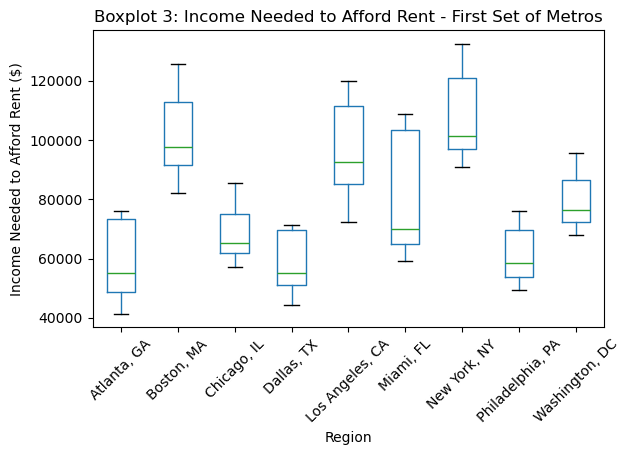

<Figure size 2200x800 with 0 Axes>

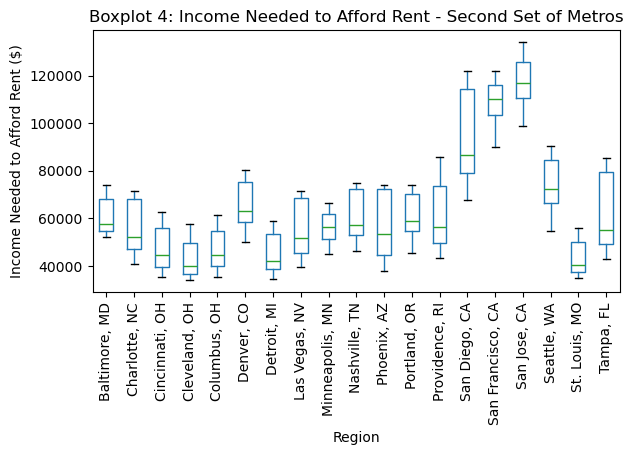

In [32]:
# Boxplot 3: Income Needed to Afford Rent - First Set
plt.figure(figsize=(20, 8))
zori_first_set.boxplot(
    column='IncomeNeededToAffordRent',
    by='RegionName',
    grid=False,
    rot=45
)
plt.title('Boxplot 3: Income Needed to Afford Rent - First Set of Metros')
plt.suptitle('')
plt.xlabel('Region')
plt.ylabel('Income Needed to Afford Rent ($)')
plt.tight_layout()
plt.show()

# Boxplot 4: Income Needed to Afford Rent - Second Set
plt.figure(figsize=(22, 8))
zori_second_set.boxplot(
    column='IncomeNeededToAffordRent',
    by='RegionName',
    grid=False,
    rot=90
)
plt.title('Boxplot 4: Income Needed to Afford Rent - Second Set of Metros')
plt.suptitle('')
plt.xlabel('Region')
plt.ylabel('Income Needed to Afford Rent ($)')
plt.tight_layout()
plt.show()


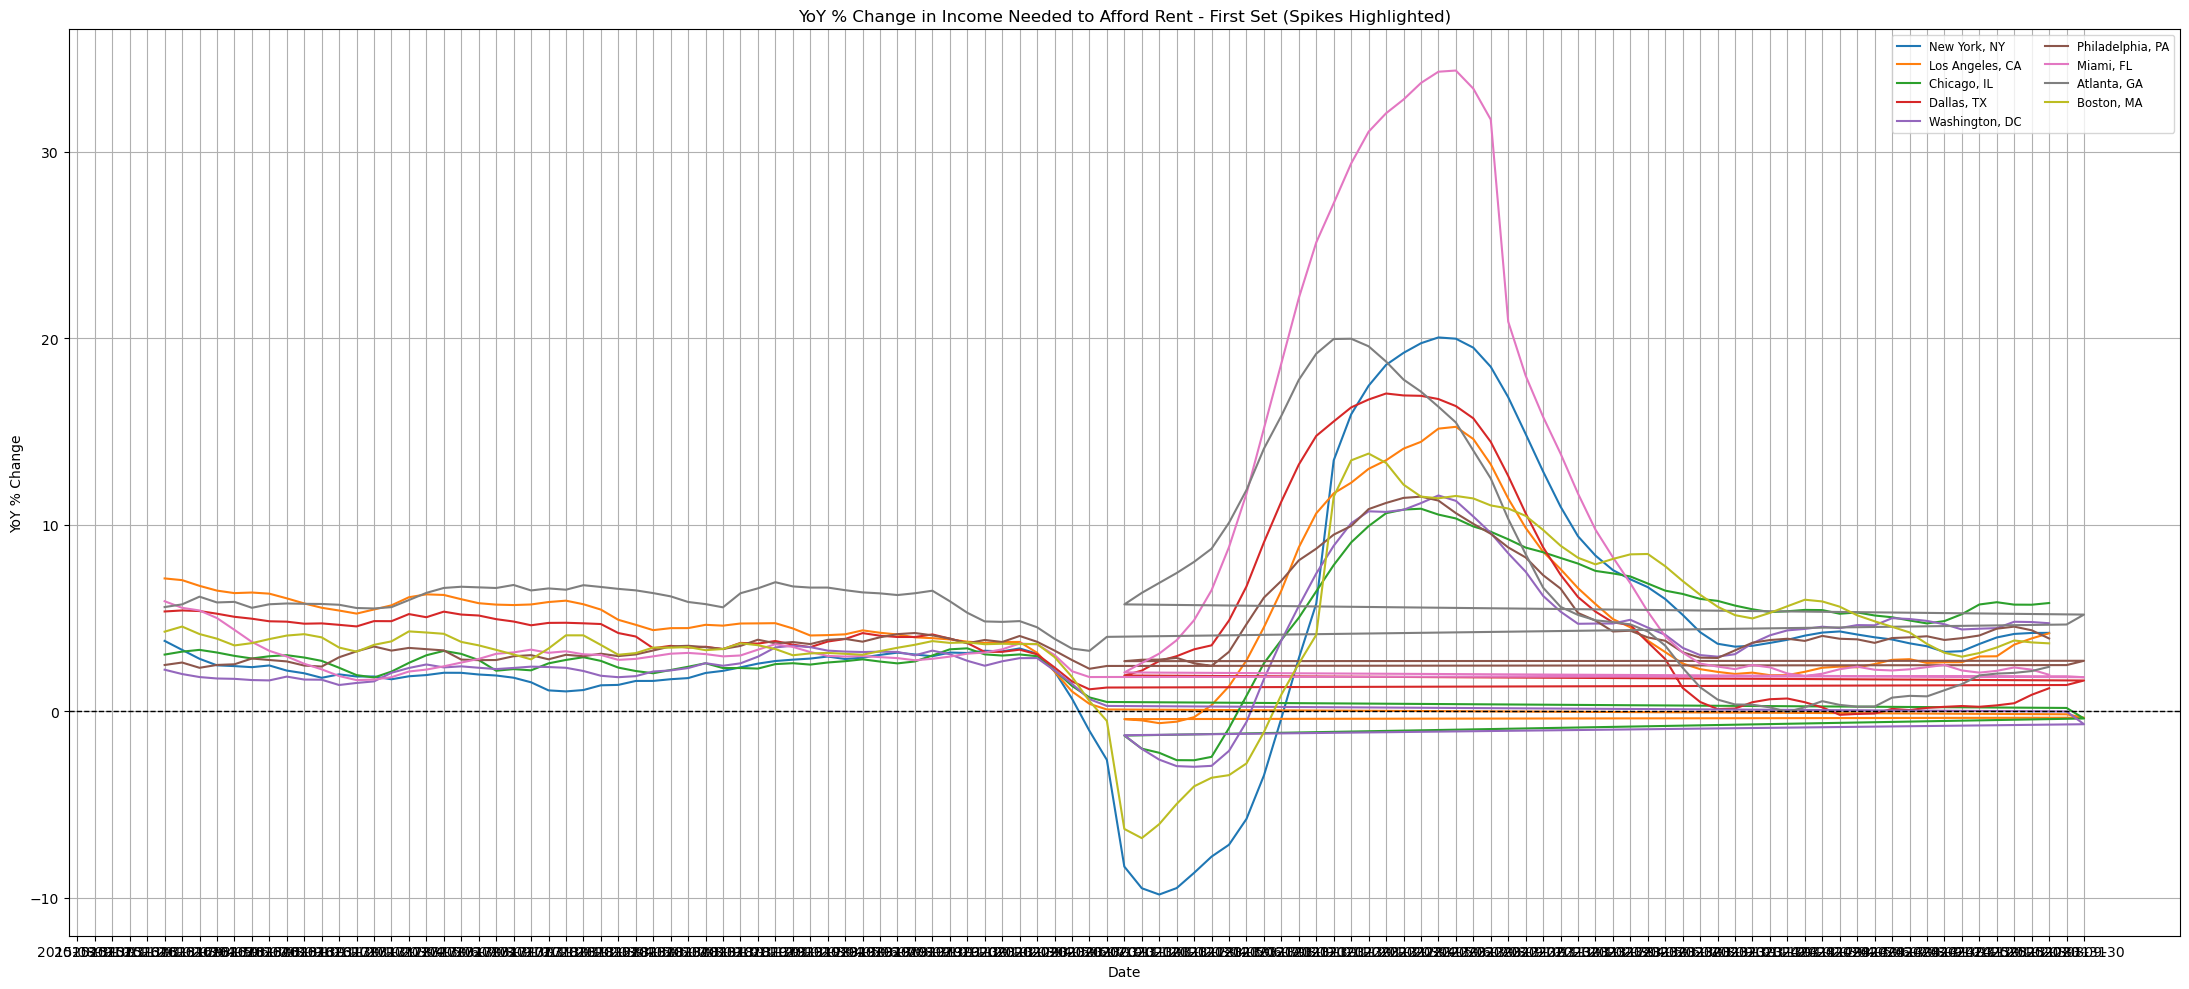

In [33]:
# --- CONTINUATION ---

# Safe copy and sorting
zori_first_set_yoy = zori_first_set.copy()
zori_first_set_yoy = zori_first_set_yoy.sort_values(['RegionName', 'Date'])

# Calculate YoY Change
zori_first_set_yoy['IncomeNeededYoYChange'] = zori_first_set_yoy.groupby('RegionName')['IncomeNeededToAffordRent'].pct_change(periods=12) * 100

# YoY Trendline for First Set (Rent Affordability) with Highlights
plt.figure(figsize=(22, 10))

for region in first_set_regions:
    region_data = zori_first_set_yoy[zori_first_set_yoy['RegionName'] == region]
    plt.plot(region_data['Date'], region_data['IncomeNeededYoYChange'], label=region)
    

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('YoY % Change in Income Needed to Afford Rent - First Set (Spikes Highlighted)')
plt.xlabel('Date')
plt.ylabel('YoY % Change')
plt.grid(True)
plt.legend(fontsize='small', ncol=2)
plt.tight_layout()
plt.show()

In [34]:
# --- CONTINUATION ---

# Merge on RegionID and Date
merged_df = pd.merge(
    zhvi_long[['RegionID', 'RegionName', 'Date', 'IncomeNeededToAffordHome']],
    zori_long[['RegionID', 'RegionName', 'Date', 'IncomeNeededToAffordRent']],
    on=['RegionID', 'RegionName', 'Date'],
    how='inner'
)

# Make sure 'Date' is datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Define the output path
output_path = "data/generated/merged_zillow_zhvi_zori.csv"

# Save the DataFrame
merged_df.to_csv(output_path, index=False)


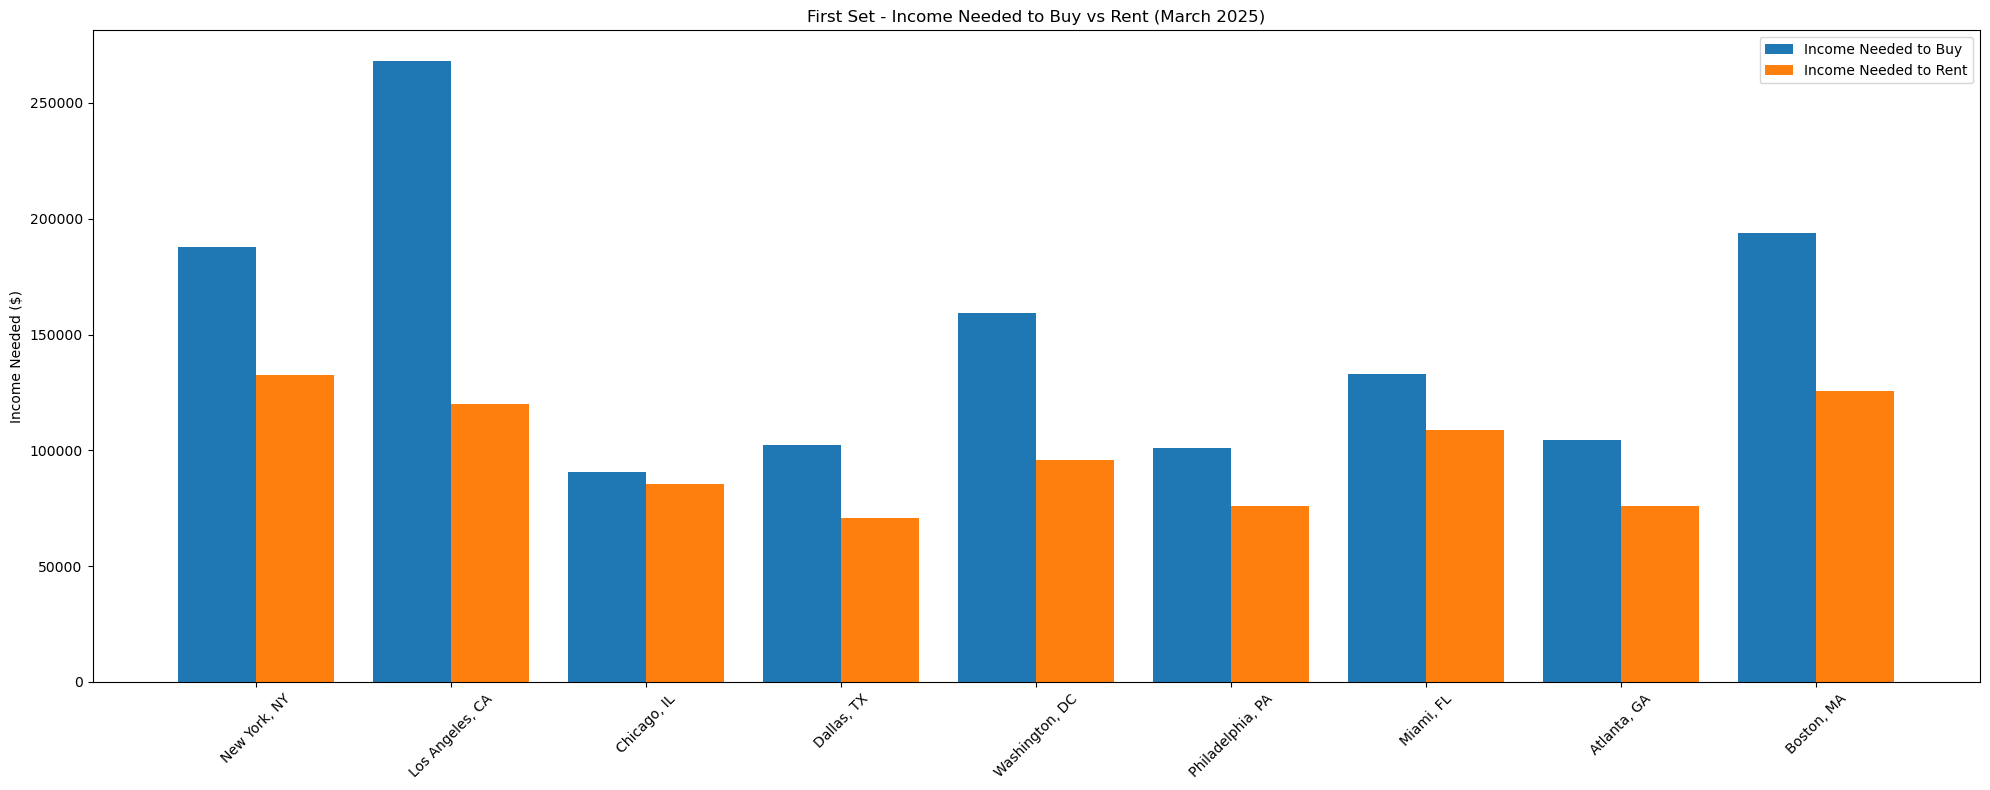

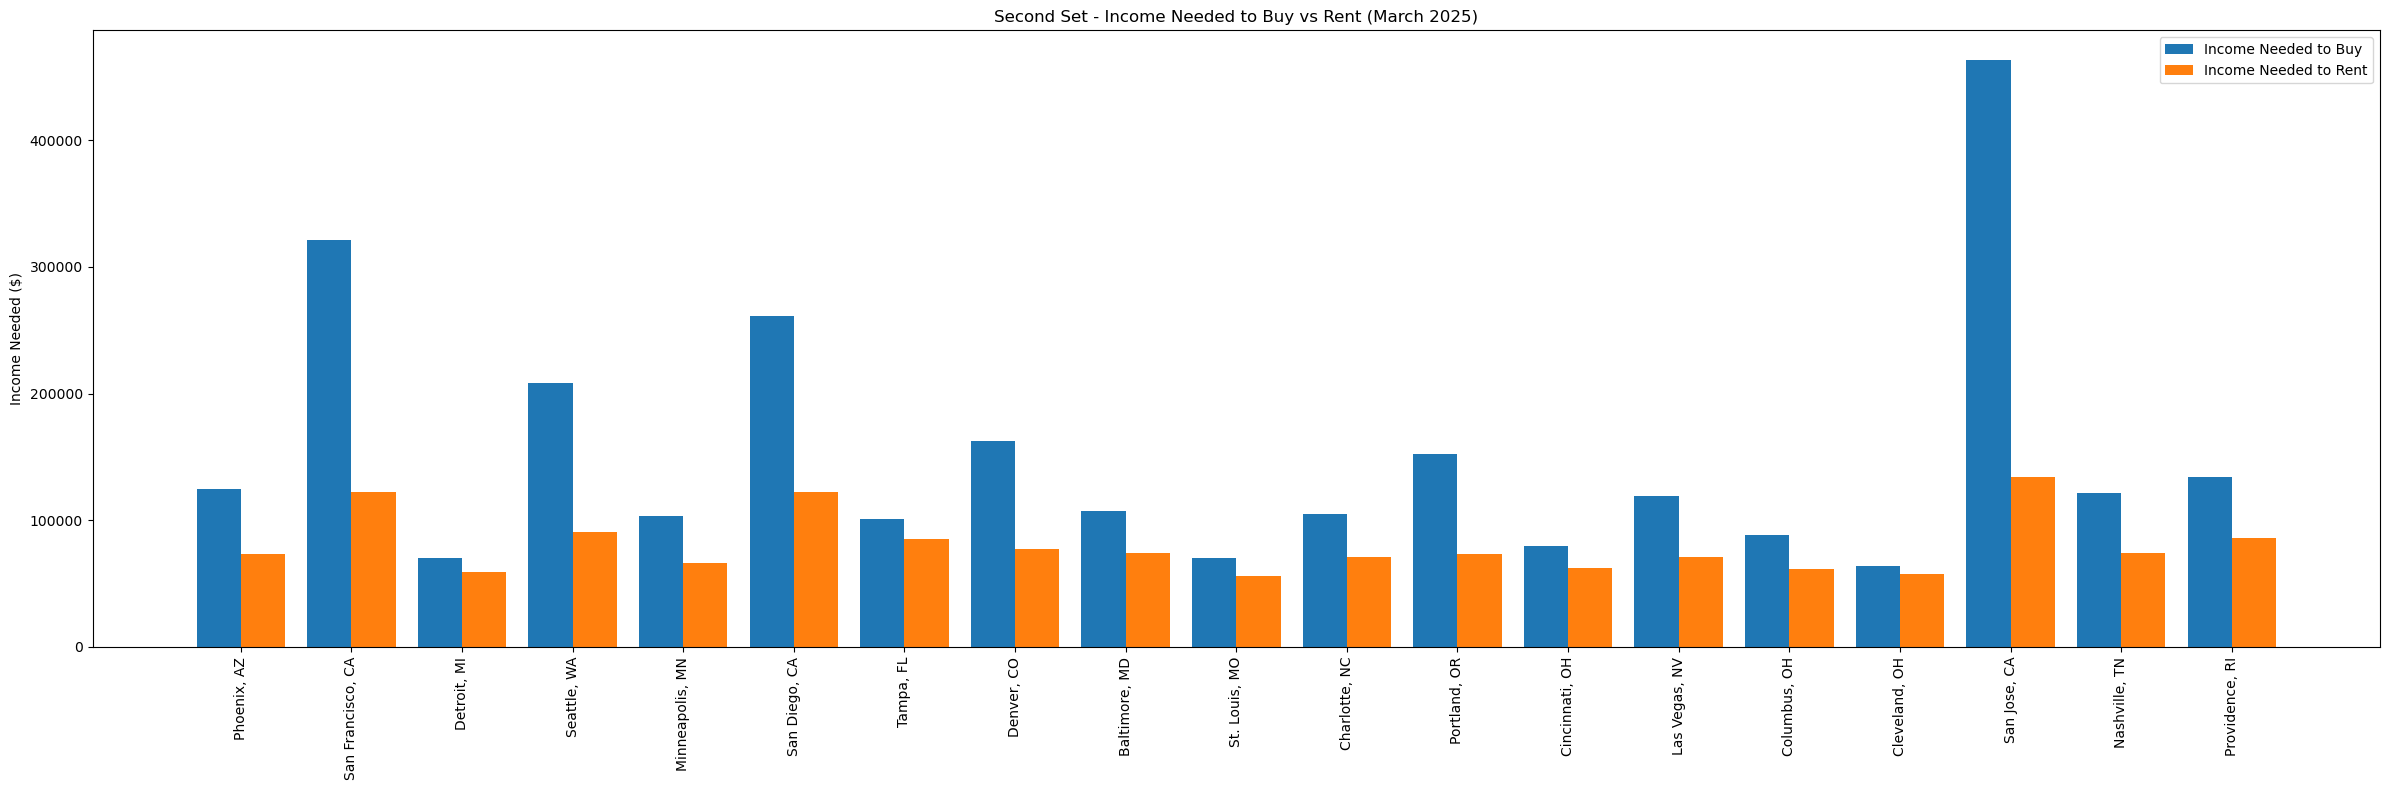

In [35]:
# Latest available month
latest_date = merged_df['Date'].max()

# Filter merged data for latest month
latest_data = merged_df[merged_df['Date'] == latest_date]

# 1. First Set
first_set_latest = latest_data[latest_data['RegionName'].isin(first_set_regions)]

# Plot Barplot for First Set
plt.figure(figsize=(20, 8))
x = range(len(first_set_latest))
plt.bar([i - 0.2 for i in x], first_set_latest['IncomeNeededToAffordHome'], width=0.4, label='Income Needed to Buy')
plt.bar([i + 0.2 for i in x], first_set_latest['IncomeNeededToAffordRent'], width=0.4, label='Income Needed to Rent')
plt.xticks(x, first_set_latest['RegionName'], rotation=45)
plt.title(f'First Set - Income Needed to Buy vs Rent ({latest_date.strftime("%B %Y")})')
plt.ylabel('Income Needed ($)')
plt.legend()
plt.tight_layout()
plt.show()

# 2. Second Set
second_set_latest = latest_data[latest_data['RegionName'].isin(second_set_regions)]

# Plot Barplot for Second Set
plt.figure(figsize=(24, 8))
x = range(len(second_set_latest))
plt.bar([i - 0.2 for i in x], second_set_latest['IncomeNeededToAffordHome'], width=0.4, label='Income Needed to Buy')
plt.bar([i + 0.2 for i in x], second_set_latest['IncomeNeededToAffordRent'], width=0.4, label='Income Needed to Rent')
plt.xticks(x, second_set_latest['RegionName'], rotation=90)
plt.title(f'Second Set - Income Needed to Buy vs Rent ({latest_date.strftime("%B %Y")})')
plt.ylabel('Income Needed ($)')
plt.legend()
plt.tight_layout()
plt.show()


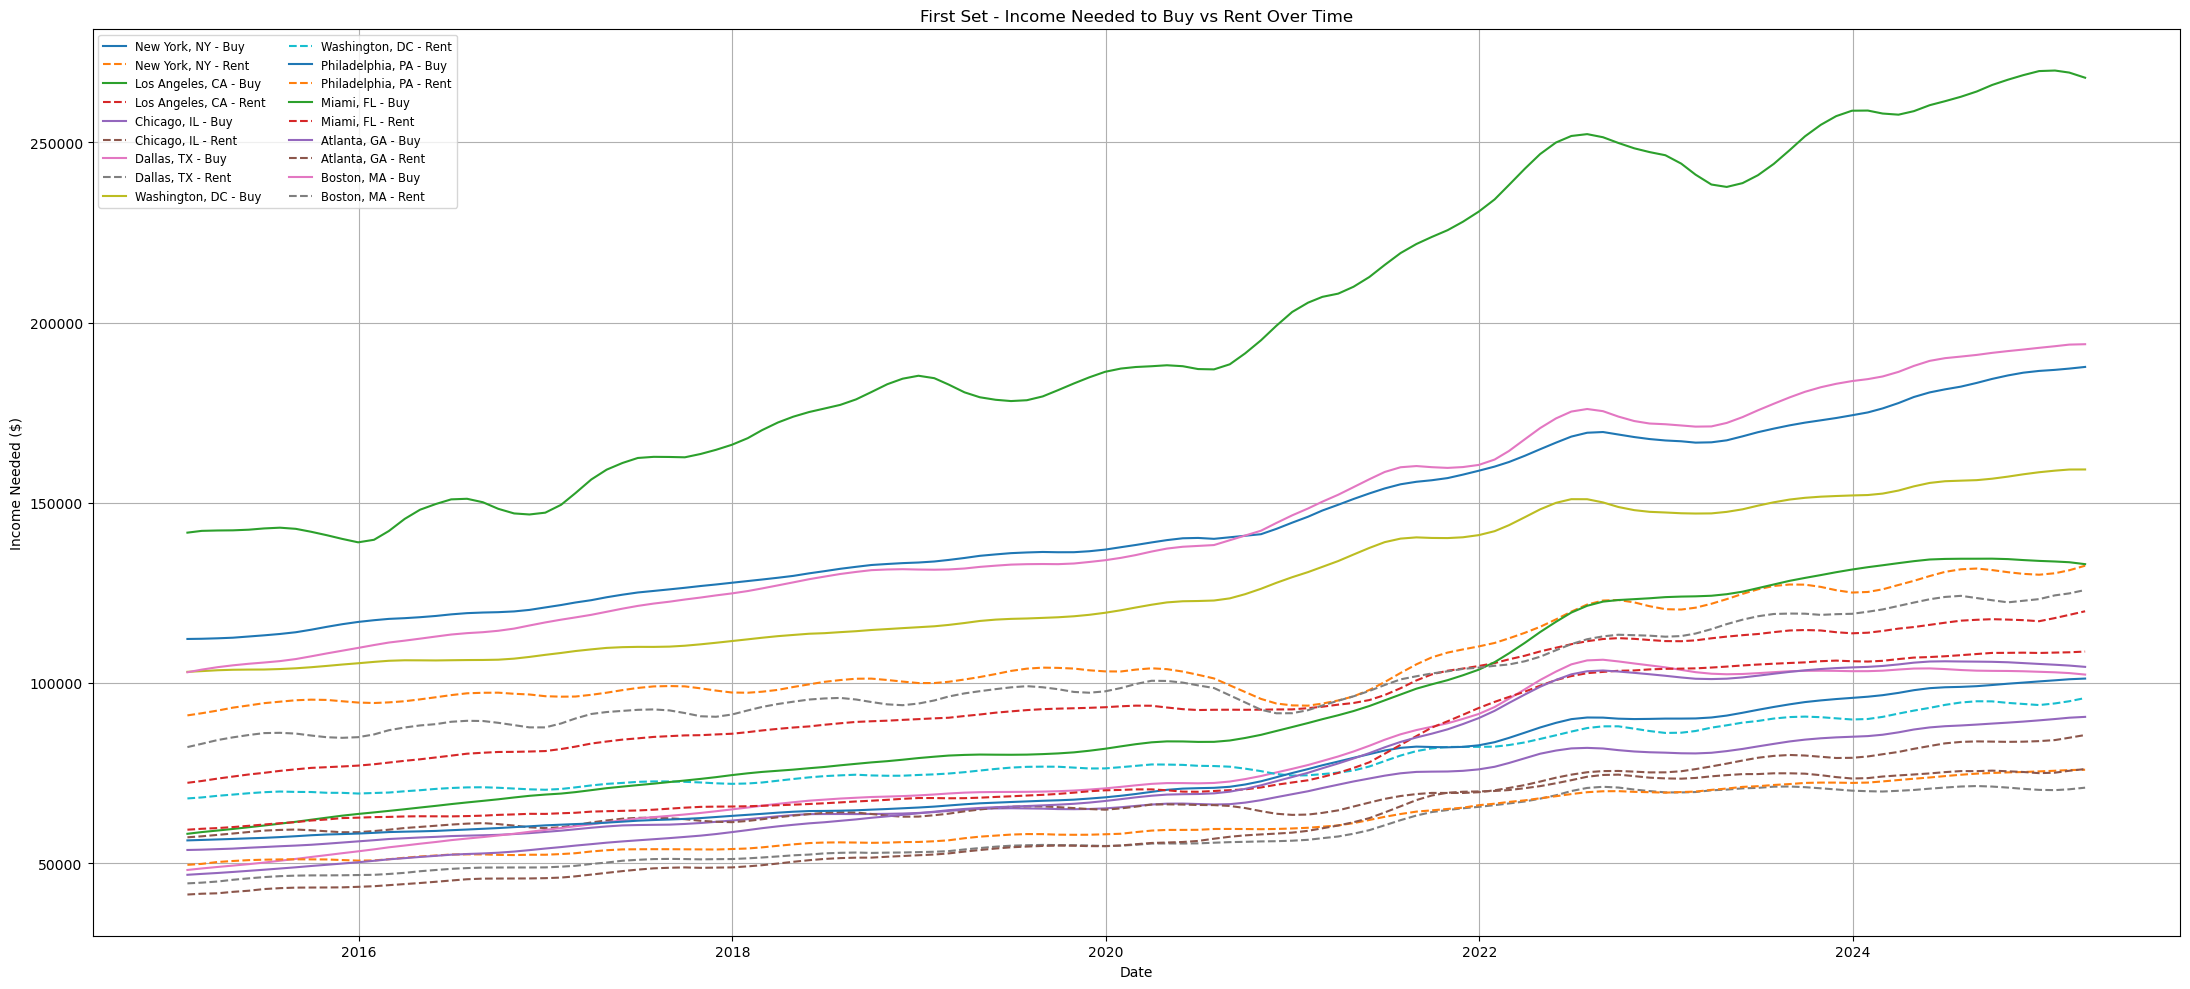

In [36]:
# 1. Line Plot - First Set
plt.figure(figsize=(22, 10))

for region in first_set_regions:
    region_data = merged_df[merged_df['RegionName'] == region]
    plt.plot(region_data['Date'], region_data['IncomeNeededToAffordHome'], label=f"{region} - Buy", linestyle='-')
    plt.plot(region_data['Date'], region_data['IncomeNeededToAffordRent'], label=f"{region} - Rent", linestyle='--')

plt.title('First Set - Income Needed to Buy vs Rent Over Time')
plt.xlabel('Date')
plt.ylabel('Income Needed ($)')
plt.legend(fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()


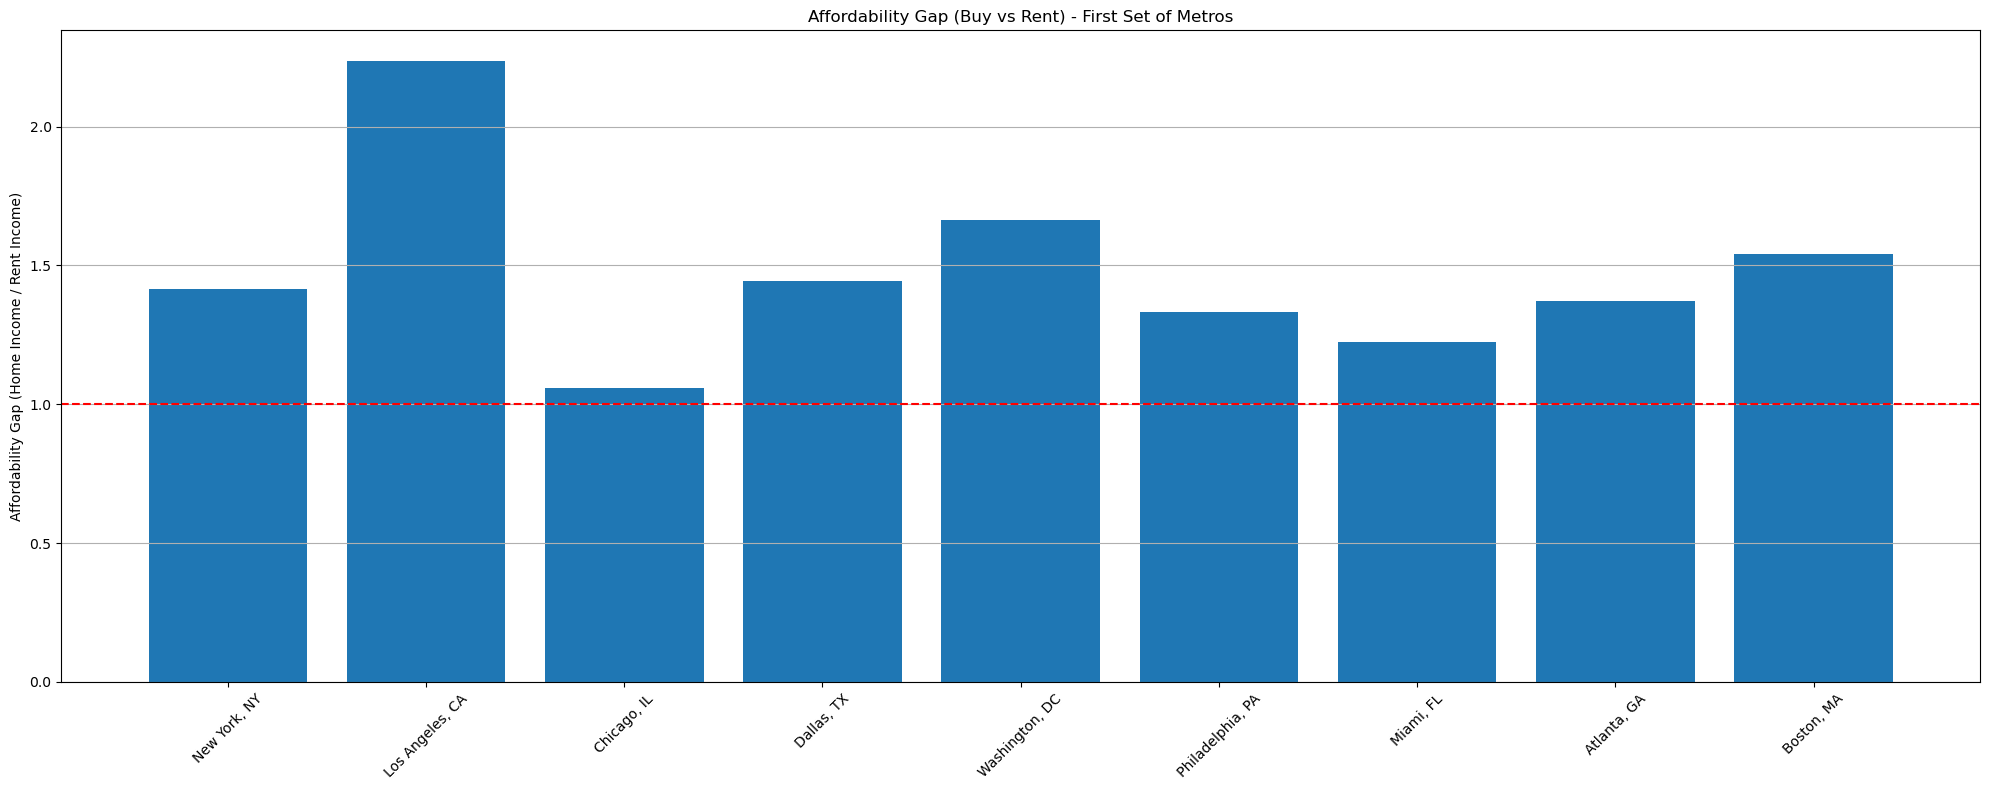

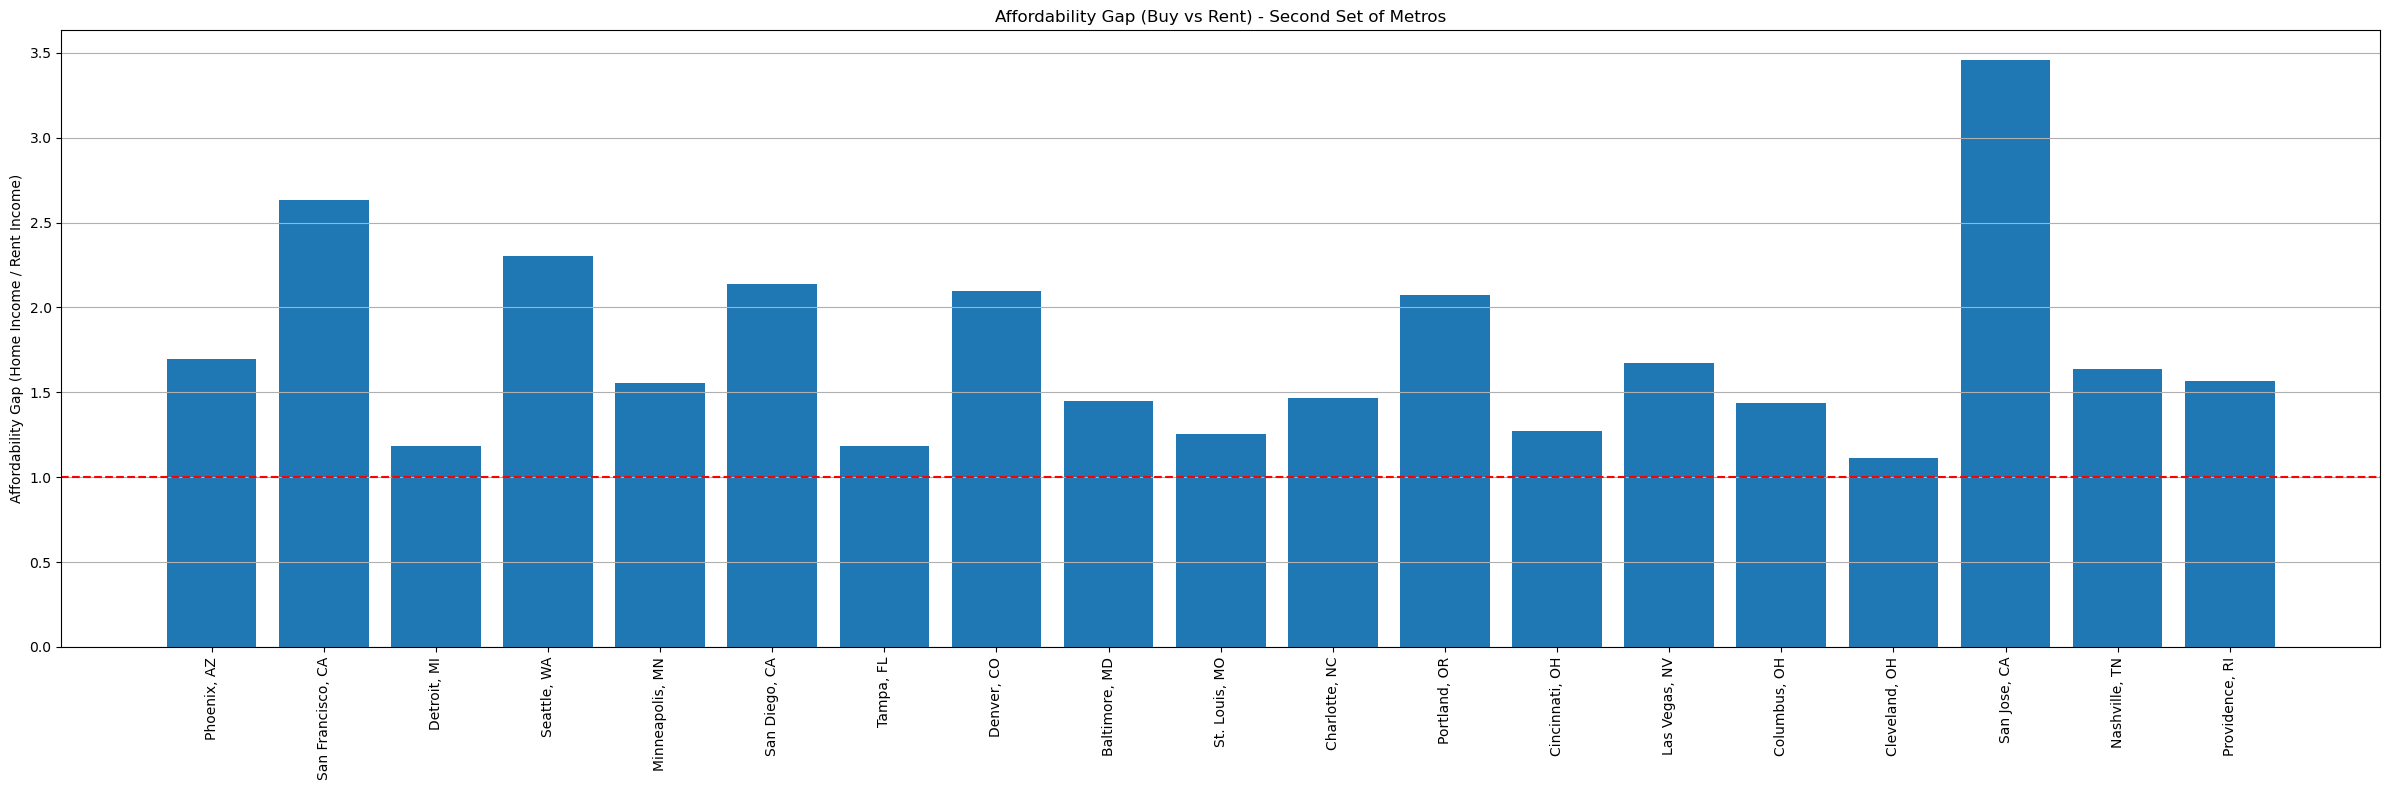

In [37]:
# --- CONTINUATION ---

# Calculate affordability gap
merged_df['AffordabilityGap'] = merged_df['IncomeNeededToAffordHome'] / merged_df['IncomeNeededToAffordRent']

# Latest month data
latest_data = merged_df[merged_df['Date'] == merged_df['Date'].max()]

# 1. First Set - Affordability Gap
first_set_gap = latest_data[latest_data['RegionName'].isin(first_set_regions)]

plt.figure(figsize=(20, 8))
plt.bar(first_set_gap['RegionName'], first_set_gap['AffordabilityGap'])
plt.axhline(1, color='red', linestyle='--')
plt.title('Affordability Gap (Buy vs Rent) - First Set of Metros')
plt.ylabel('Affordability Gap (Home Income / Rent Income)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 2. Second Set - Affordability Gap
second_set_gap = latest_data[latest_data['RegionName'].isin(second_set_regions)]

plt.figure(figsize=(24, 8))
plt.bar(second_set_gap['RegionName'], second_set_gap['AffordabilityGap'])
plt.axhline(1, color='red', linestyle='--')
plt.title('Affordability Gap (Buy vs Rent) - Second Set of Metros')
plt.ylabel('Affordability Gap (Home Income / Rent Income)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


✅ Explanation:

Bars 📊 show affordability gap per region

🔴 Red dashed line at 1 = Where renting and buying would be equally hard

Bars above 1 → Buying a home requires much more income than renting

Bars close to 1 → Renting and owning are similarly difficult

In [49]:
# --- CONTINUATION ---

# Combine both first and second sets
combined_rent_cheaper = pd.concat([first_set_rent_cheaper, second_set_rent_cheaper])

# Sort descending by AffordabilityGap
top5_rent_cheaper = combined_rent_cheaper.sort_values('AffordabilityGap', ascending=False).head(5)

# Display Top 5
print("🏆 Top 5 Metros Where Renting is Much Better than Buying:")
print(top5_rent_cheaper)


🏆 Top 5 Metros Where Renting is Much Better than Buying:
              RegionName  AffordabilityGap
40969       San Jose, CA          3.459162
40946  San Francisco, CA          2.631872
40949        Seattle, WA          2.305253
40936    Los Angeles, CA          2.235067
40951      San Diego, CA          2.140205


In [50]:
# Check Providence, RI
providence = latest_data[latest_data['RegionName'] == 'Providence, RI'][['RegionName', 'AffordabilityGap']]

print(providence)


           RegionName  AffordabilityGap
40972  Providence, RI          1.566275


Interpretation:
If AffordabilityGap > 1 → Renting is cheaper than Buying ✅

If AffordabilityGap < 1 → Buying is cheaper than Renting ❌

In [52]:
# --- CONTINUATION ---

# 1. Overall Average Affordability Gap (across all metros)
overall_avg_affordability_gap = latest_data['AffordabilityGap'].mean()

# 2. Second Set Average Affordability Gap
second_set_avg_affordability_gap = latest_data[latest_data['RegionName'].isin(second_set_regions)]['AffordabilityGap'].mean()

# 3. Providence Affordability Gap
providence_gap = latest_data[latest_data['RegionName'] == 'Providence, RI']['AffordabilityGap'].values[0]

# Display
print(f"🏡 Overall Average Affordability Gap (All Metros): {overall_avg_affordability_gap:.2f}")
print(f"🏙️ Second Set Average Affordability Gap: {second_set_avg_affordability_gap:.2f}")
print(f"📍 Providence, RI Affordability Gap: {providence_gap:.2f}")

# Compare Providence
if providence_gap > overall_avg_affordability_gap:
    print("✅ Providence has a HIGHER affordability gap than the overall metro average across the US — buying is harder compared to renting.")
else:
    print("✅ Providence has a LOWER affordability gap than the overall metro average — buying is relatively less harder compared to renting.")

if providence_gap > second_set_avg_affordability_gap:
    print("✅ Providence has a HIGHER affordability gap than the second set average too.")
else:
    print("✅ Providence has a LOWER affordability gap than the second set average which is more a comparison of its peer metros.")


🏡 Overall Average Affordability Gap (All Metros): 1.40
🏙️ Second Set Average Affordability Gap: 1.75
📍 Providence, RI Affordability Gap: 1.57
✅ Providence has a HIGHER affordability gap than the overall metro average across the US — buying is harder compared to renting.
✅ Providence has a LOWER affordability gap than the second set average which is more a comparison of its peer metros.
